In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!sudo apt-get install libeigen3-dev cmake swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  libeigen3-doc libmrpt-dev swig-doc swig-examples swig3.0-examples
  swig3.0-doc
The following NEW packages will be installed:
  libeigen3-dev swig swig3.0
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 1,910 kB of archives.
After this operation, 13.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libeigen3-dev all 3.3.4-4 [810 kB]
Fetched 1,910 kB in 2s (1,251 kB/s)
debconf: unable to initialize frontend:

In [ ]:
!git clone https://github.com/x75/otl.git

Cloning into 'otl'...
remote: Enumerating objects: 594, done.
remote: Total 594 (delta 0), reused 0 (delta 0), pack-reused 594
Receiving objects: 100% (594/594), 482.99 KiB | 12.38 MiB/s, done.
Resolving deltas: 100% (304/304), done.


In [ ]:
%cd otl

/content/otl


In [ ]:
!mkdir build

In [ ]:
%cd build

/content/otl/build


In [ ]:
!sudo cmake ../

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Configuring done
-- Generating done
-- Build files have been written to: /content/otl/build


In [ ]:
%cd /content/otl/build

/content/otl/build


In [ ]:
!sudo make

Scanning dependencies of target OTL
[  6%] Building CXX object CMakeFiles/OTL.dir/src/libOTL/otl_helpers.cpp.o
[ 13%] Building CXX object CMakeFiles/OTL.dir/src/libOTL/otl_kernel_gaussian.cpp.o
[ 20%] Building CXX object CMakeFiles/OTL.dir/src/libOTL/otl_kernel_recursive_gaussian.cpp.o
[ 26%] Building CXX object CMakeFiles/OTL.dir/src/libOTL/otl_kernel_recursive_equality_gaussian.cpp.o
[ 33%] Building CXX object CMakeFiles/OTL.dir/src/libOTL/otl_rls.cpp.o
[ 40%] Building CXX object CMakeFiles/OTL.dir/src/libOTL/otl_reservoir.cpp.o
[ 46%] Building CXX object CMakeFiles/OTL.dir/src/libOTL/otl_window.cpp.o
[ 53%] Building CXX object CMakeFiles/OTL.dir/src/libOTL/otl_sogp.cpp.o
[ 60%] Building CXX object CMakeFiles/OTL.dir/src/libOTL/otl_oesgp.cpp.o
[ 66%] Building CXX object CMakeFiles/OTL.dir/src/libOTL/otl_storkgp.cpp.o
[ 73%] Linking CXX static library libOTL.a
[ 73%] Built target OTL
Scanning dependencies of target storkgp_sin
[ 80%] Building CXX object CMakeFiles/storkgp_sin.dir/src/

In [ ]:
!sudo cmake ../ -DBUILD_PYTHON_BINDINGS=ON -DBUILD_DOCS=ON

-- Could NOT find Doxygen (missing: DOXYGEN_EXECUTABLE) 
-- Found SWIG: /usr/bin/swig3.0 (found version "3.0.12") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.6m.so (found version "3.6.9") 
-- Configuring done
-- Generating done
-- Build files have been written to: /content/otl/build


In [ ]:
ls

CMakeCache.txt  cmake_install.cmake  Makefile    storkgp_sin*
CMakeFiles/     libOTL.a             oesgp_sin*


In [ ]:
%cd  /content/drive/'My Drive'/MSCodeGoogleColab/'OIESGPOESGP'/

/content/drive/My Drive/MSCodeGoogleColab/OIESGPOESGP


In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pylab as plt
from otl_oesgp import OESGP
from numpy.linalg import norm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import csv
import os
import datetime


In [ ]:


    
    # Create our OESGP object
    oesgp = OESGP()

    # Our parameters
    ip_dim = 1
    op_dim = 1

    res_size = 100
    input_weight = 0.2          #decreasing helps graph become similar
    output_feedback_weight = 0.1    #changing has no effect
    activation_function = 1
    leak_rate = 0.0
    connectivity = 0.1
    spectral_radius = 0.6           #optimal at 0.6, 0.4 makes error bigger
    kernel_params = [3.0, 3.0]      #optimal at 3, 3
    noise = 0.0001
    epsilon = 1e-3
    capacity = 100
    random_seed = 0

    # Initialise our OESGP
    oesgp.init(ip_dim, op_dim, res_size, input_weight, output_feedback_weight,
               activation_function, leak_rate, connectivity, spectral_radius,
               False, kernel_params, noise, epsilon, capacity, random_seed)

In [ ]:
    typee = 0  # 0 = systolic, 1 = diastolic, 2 = heartrate
    basedir = "/content/drive/My Drive/MSCodeGoogleColab/OIESGPOESGP"
    filename = 'Etiqa_ajanthini'
    outputfilename = basedir+"/OESGPResults/" + "prediction_" +str(typee) +"_" + filename + ".csv"
    print(outputfilename)
    print(basedir+'/'+filename+'.csv')
    data = pd.read_csv(basedir+'/'+filename+'.csv')
    datacopy = data.copy(deep=True)


/content/drive/My Drive/MSCodeGoogleColab/OIESGPOESGP/OESGPResults/prediction_0_Etiqa_ajanthini.csv
/content/drive/My Drive/MSCodeGoogleColab/OIESGPOESGP/Etiqa_ajanthini.csv


In [ ]:
from helpers import get_normalized, get_denormalised


In [ ]:

    # loop through some sample code
    count = len(data)

    bloodpressure = []
    upperlimity = 0
    lowerlimity = 0
    title = 'Prediction of '
    figname = filename + '_type_' + str(typee) + '_oiesgpresult.png'

    """Systolic"""
    if typee == 0:
        bloodpressure = data.iloc[:, 0]
        upperlimity = 150
        lowerlimity = 70
        title = title + 'Systolic Values'
    elif typee == 1:
        bloodpressure = data.iloc[:, 1]
        upperlimity = 120
        lowerlimity = 50
        title = title + 'Diastolic Values'
    elif typee == 2:
        bloodpressure = data.iloc[:, 2]
        upperlimity = 200
        lowerlimity = 0
        title = title + 'Heart Rate Values'

    from helpers import get_normalized, get_denormalised

    bloodpressure = np.array(bloodpressure).astype('float')
    normalized_ds = get_normalized(bloodpressure)

    tsmax = bloodpressure.max()
    tsmin = bloodpressure.min()

    normalized_time = pd.to_datetime(data.iloc[:, 3])
    normalized_time = np.array(normalized_time)#.astype('float')

    totalData = np.ndarray((2000, 2))


In [ ]:
    for i in range(0, 2000):
        totalData[i, 0] = normalized_ds[i]
        totalData[i, 1] = normalized_ds[i + 1]
    datacopy.iloc[:, 0] = normalized_ds
    import math
    trainingCount = int(math.floor(len(normalized_ds) * 0.7))
    testingCount = len(normalized_ds) - trainingCount
    original = []
    testprediction = []
    testingResults = []
    variances = []
    errorarr = []
    x_list = []


In [ ]:
    import numpy as np
    runlooplen = len(totalData)-2
    testindex = runlooplen - 250

    for j in range(2, runlooplen):
        predictedResults = []
        variance = []

        input = [normalized_ds[j-1]]#, t]
        output = [normalized_ds[j]]

        oesgp.update(input)

        if j > testindex:
            oesgp.predict(predictedResults, variance)

            error = norm(np.array(predictedResults) - np.array(output))

            original.append(output[0])

            testingResults.append(predictedResults[0])

            variances.append(variance[0])
            errorarr.append(error)
            x_list.append(j-testindex)

        #print("Error: ", error)

        oesgp.train(output)

    oesgp.save("test-modeltest2")


Text(0,0.5,'Predicted Value')

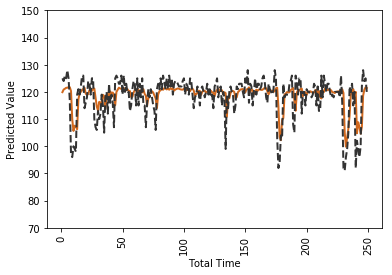

In [ ]:
    denormtesting = get_denormalised(np.array(testingResults), tsmax, tsmin)
    denormorig = get_denormalised(np.array(original), tsmax, tsmin)
    denormvariance = get_denormalised(np.array(variances), tsmax, tsmin)

    plt.xticks(rotation=90)

    plt.ylim([lowerlimity, upperlimity])
    # marker='o', markerfacecolor='blue',
    # marker='o', markerfacecolor='red',

    plt.plot(x_list, denormtesting, markersize=4, color='chocolate', label='Prediction',linewidth=2)
    plt.plot(x_list, denormorig, markersize=4, color='#333333', label='Original', linewidth=2 , linestyle='dashed')
    plt.xlabel('Total Time')
    plt.ylabel('Predicted Value')
    #plt.plot(x_list, errorarr, color='green', label='Error')
    #plt.plot(variances, color='blue', label='Variance')

    

Type: 0
0.02764236594142548
0.166259934865
0.11653148567824906


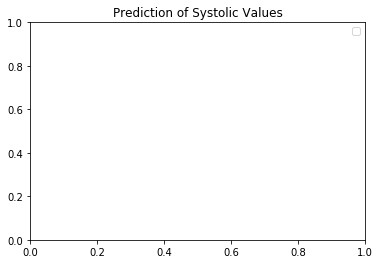

<Figure size 432x288 with 0 Axes>

In [ ]:
    mae = mean_absolute_error(original, testingResults) ##testingResults) #
    mse = mean_squared_error(original, testingResults) ##testingResults) #
    rmse = math.sqrt(mse)

    print('Type: '+str(type))
    print(mse)
    print(rmse)
    print(mae)

    """Write results to file"""
    # results = pd.DataFrame({'Original': denormorig, 'Predicted': denormtesting, 'Variance' : denormvariance})
    # results.to_csv(outputfilename+'regen', sep=',')

    plt.legend(loc='best')
    plt.title(title)

    #plt.suptitle('MAE: '+str(mae)+'  MSE: '+str(mse)+'  RMSE: '+str(rmse), fontsize=14, fontweight='bold')
    #plt.show(block=False)

    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig(figname, dpi=100)